# DSCI 100 Group 29 Project: Classifying Dry Bean Type

**Group Members:** Janine Dang, Tarini Lavindran, Manuela Mezquita Garcia-Poggio, Saksham Saksham

## Introduction

Dry beans are a staple in kitchens around the world. In most developing countries, almost 50% legumes consumed are dry beans (Mamidi et al., 2011). Harvested beans are sorted by their physical characteristics, so it is crucial that producers develop an efficient system. With the help of new technology like computer vision systems (CVSs), classifying beans has become more efficient (Koklu & Ozkan, 2020). 

Project Question: Can we classify the type of dry bean based on its features, and if so, is it possible to create a classification with high accuracy based on a dataset of dry bean features? Which features will be best in determining bean type?

The dataset we are using is [the Dry Beans Dataset from UC Irvine](https://archive.ics.uci.edu/dataset/602/dry+bean+dataset), which was created in 2020 with the use of a high resolution camera and CVSs (Koklu & Ozkan, 2020). Researchers took images of 13,611 grains from the seven types of dry beans and applied segmentation and feature extraction processes to these images. The variables in this dataset are below.

|   **Variables**   | Description                              |
|:------------|:--------------------------------------------------------------------|
|  Area   |  The area of a bean in pixels.                                      |
|  Perimeter   |  The circumference of a bean in pixels.                        |
|  MajorAxisLength    |The longest line that can be drawn from a bean in pixels.|
|MinorAxisLength|The longest line that can be drawn from the bean perpendicular to the MajorAxisLength in pixels.|
|AspectRatio|The ratio of the bean’s MajorAxisLength and MinorAxisLength.|
|Eccentricity|The eccentricity of an ellipse with a value between 0 and 1, 0 being a perfect circle and 1 being a line segment.|
|ConvexArea|The number of pixels in the smallest convex polygon that can contain the area of a bean seed.|
|EquivDiameter|The diameter of a circle that has the same area as a bean seed area in pixels.|
|Extent|The ratio of the pixels outside the bean area to the pixels in the bean area.|
|Solidity|The convexity of a bean.|
|Roundness|$(4piArea)/(Perimeter^2)$|
|Compactness|Measures the roundness of a bean in pixels.|
|Shape Factor 1|$(MajorAxisLength / Area)$|
|Shape Factor 2|$(MinorAxisLength / Area)$|
|Shape Factor 3|$(Area / ((Shape Factor 1)^2 * pi))$|
|Shape Factor 4|$(Area / ((Shape Factor 1) * (Shape Factor 2) * pi))$|
|Class|The different types of beans: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira.|

<div align="center"> Table 1. Dry Beans Dataset Variables</div>

## Preliminary Exploratory Data Analysis

In [3]:
#load libraries
set.seed(1234)
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(dplyr)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

**Loading Our Data**

In [4]:
# URL of the dry bean dataset
dry_bean_url <- "https://raw.githubusercontent.com/janinedang/dsci-100-group_29/main/dry_bean_dataset.csv"

# Download the file from the URL onto our local computer
download.file(dry_bean_url, "dry_bean.csv")

# Read the csv file and rename the columns.
dry_bean <- read_csv("dry_bean.csv", col_names = FALSE, skip=1) |>
            rename("area" = X1,
                   "perimeter" = X2,
                   "major_axis_length" = X3,
                   "minor_axis_length" = X4,
                   "aspect_ratio" = X5,
                   "eccentricity" = X6,
                   "convex_area" = X7,
                   "equiv_diameter" = X8,
                   "extent" = X9,
                   "solidity" = X10,
                   "roundness" = X11,
                   "compactness" = X12,
                   "shape_factor_1" = X13,
                   "shape_factor_2" = X14,
                   "shape_factor_3" = X15,
                   "shape_factor_4" = X16,
                   "class" = X17) 

head(dry_bean)

Rows: 13611 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): X17
dbl (16): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


area,perimeter,major_axis_length,minor_axis_length,aspect_ratio,eccentricity,convex_area,equiv_diameter,extent,solidity,roundness,compactness,shape_factor_1,shape_factor_2,shape_factor_3,shape_factor_4,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER


<div align="center">Table 2. Dry Beans Dataset</div>

**1) Tidying and Wrangling the Data**

In [5]:
# Mutate the class vector to change the type of data from character <chr> to factor <fct>.
dry_bean_tidy <- dry_bean |>
                 mutate(class = as_factor(class))

head(dry_bean_tidy)

area,perimeter,major_axis_length,minor_axis_length,aspect_ratio,eccentricity,convex_area,equiv_diameter,extent,solidity,roundness,compactness,shape_factor_1,shape_factor_2,shape_factor_3,shape_factor_4,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER


<div align="center">Table 3. Tidied Dry Beans Dataset</div>

**2) Separating the data into training and testing sets**

In [6]:
# Separate the dataset into training and testing sets. 
dry_bean_split <- initial_split(dry_bean_tidy, prop = 0.75, strata = class)

# Training set
dry_bean_train <- training(dry_bean_split)

# Testing set
dry_bean_test <- testing(dry_bean_split)


In [7]:
# Use glimpse to view the data with a large number of columns, where the columns go down the page,
# and on both training and testing sets to see if the initial data was split accordingly.

glimpse(dry_bean_train)
glimpse(dry_bean_test)

Rows: 10,207
Columns: 17
$ area              <dbl> 43145, 49317, 49777, 49975, 50166, 50683, 50798, 510…
$ perimeter         <dbl> 799.426, 886.931, 861.277, 873.529, 893.846, 905.491…
$ major_axis_length <dbl> 273.4029, 310.5631, 300.7570, 313.9997, 313.0216, 31…
$ minor_axis_length <dbl> 201.2669, 202.4589, 211.6169, 203.9383, 204.6558, 20…
$ aspect_ratio      <dbl> 1.358410, 1.533956, 1.421234, 1.539680, 1.529503, 1.…
$ eccentricity      <dbl> 0.6768132, 0.7582971, 0.7105824, 0.7603739, 0.756661…
$ convex_area       <dbl> 43812, 50400, 50590, 50699, 51209, 51613, 52164, 517…
$ equiv_diameter    <dbl> 234.3799, 250.5840, 251.7500, 252.2502, 252.7317, 25…
$ extent            <dbl> 0.7661233, 0.7130856, 0.8019107, 0.7147965, 0.762517…
$ solidity          <dbl> 0.9847759, 0.9785119, 0.9839296, 0.9857196, 0.979632…
$ roundness         <dbl> 0.8483671, 0.7878197, 0.8432433, 0.8230155, 0.789030…
$ compactness       <dbl> 0.8572690, 0.8068700, 0.8370543, 0.8033453, 0.807394…
$ shape_factor_

**Exploratory Data Analysis**

In [8]:
# Group and summarize to find how many beans exist in each class.
dry_bean_summarize <- dry_bean_train |>
                      group_by(class) |>
                      summarize(count = n()) |>
                      mutate(percent = 100 * count / nrow(dry_bean_train))

dry_bean_summarize

class,count,percent
<fct>,<int>,<dbl>
SEKER,1516,14.852552
BARBUNYA,976,9.562065
BOMBAY,423,4.144215
CALI,1226,12.011365
HOROZ,1437,14.078574
SIRA,1970,19.300480
DERMASON,2659,26.050749


<div align="center">Table 4. Number of Observations in Each Class</div>

**3) Selecting variables for prediction**

To find our predictors, we want to find trends between variables and the bean types. These trends typically occur when variables have strong relationships with each other. We will be using `cor()` and `ggpairs` to find these trends.

First, we will split our data into a smaller dataframe so that `ggpairs` can load the data points, then plot chunks of variables at a time as `ggpairs` runs slowly when plotting many variables for large amounts of data.

In [9]:
# Split training data into a smaller dataframe so that ggpairs can run it.
dry_bean_small <- initial_split(dry_bean_train, prop = 0.18, strata = class) |>
                  training()

Import the library for the `cor()` function.

In [10]:
install.packages("Hmisc")
library("Hmisc")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘Hmisc’


The following object is masked from ‘package:parsnip’:

    translate


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




Now, we find the correlation between each predictor with one another to find the highest correlation between predictors.

In [11]:
dry_bean_correlation <- cor(select(dry_bean, -class))
dry_bean_correlation

,area,perimeter,major_axis_length,minor_axis_length,aspect_ratio,eccentricity,convex_area,equiv_diameter,extent,solidity,roundness,compactness,shape_factor_1,shape_factor_2,shape_factor_3,shape_factor_4
area,1.00000000,0.96672218,0.93183359,0.951601599,0.241734796,0.26748137,0.99993923,0.98496752,0.05434485,-0.1965845,-0.3575303,-0.268066825,-0.847958328,-0.6392907,-0.272144848,-0.3557214
perimeter,0.96672218,1.00000000,0.97733775,0.913178555,0.385275645,0.39106554,0.96768921,0.99138043,-0.02115958,-0.3039696,-0.5476467,-0.406856863,-0.864622945,-0.7675923,-0.408435296,-0.4293098
major_axis_length,0.93183359,0.97733775,1.00000000,0.826051550,0.550334771,0.54197162,0.93260701,0.96173336,-0.07806191,-0.2843023,-0.5963576,-0.568377073,-0.773608665,-0.8592376,-0.568184805,-0.4825272
minor_axis_length,0.95160160,0.91317856,0.82605155,1.000000000,-0.009161131,0.01957387,0.95133933,0.94853889,0.14595706,-0.1558308,-0.2103439,-0.015066473,-0.947204167,-0.4713470,-0.019326233,-0.2637490
aspect_ratio,0.24173480,0.38527565,0.55033477,-0.009161131,1.000000000,0.92429255,0.24330102,0.30364704,-0.37018356,-0.2677543,-0.7669793,-0.987687299,0.024592773,-0.8378412,-0.978592275,-0.4492641
eccentricity,0.26748137,0.39106554,0.54197162,0.019573875,0.924292554,1.00000000,0.26925479,0.31866708,-0.31936188,-0.2975923,-0.7222725,-0.970313022,0.019919682,-0.8601408,-0.981057697,-0.4493537
convex_area,0.99993923,0.96768921,0.93260701,0.951339329,0.243301025,0.26925479,1.00000000,0.98522625,0.05256368,-0.2061913,-0.3620826,-0.269922448,-0.847949735,-0.6408616,-0.274024160,-0.3620492
equiv_diameter,0.98496752,0.99138043,0.96173336,0.948538894,0.303647037,0.31866708,0.98522625,1.00000000,0.02838294,-0.2316477,-0.4359445,-0.327649979,-0.892740731,-0.7130686,-0.330389365,-0.3925118
extent,0.05434485,-0.02115958,-0.07806191,0.145957056,-0.370183561,-0.31936188,0.05256368,0.02838294,1.00000000,0.1913885,0.3444112,0.354211746,-0.141616424,0.2379557,0.347624414,0.1485024
solidity,-0.19658454,-0.30396957,-0.28430228,-0.155830824,-0.267754288,-0.29759231,-0.20619129,-0.23164769,0.19138854,1.0000000,0.6071500,0.303766114,0.153387620,0.3435593,0.307662465,0.7021629


<div align="center">Table 5. Correlation Between Variables in the Dry Beans Dataset</div>

Based on the correlation table above, we can see that the variables `area`, `perimeter`, `major_axis_length`, `minor_axis_length`, `convex_area`, `equiv_diameter`, `eccentricity`, `aspect_ratio`, `shape_factor_3`, and `compactness` all have correlation among each other that is greater than 0.9.
So, we can plot graphs using ggpairs to see their correlation between each other better.

Now, we will plot the variables `area`, `perimeter`, `major_axis_length`, `minor_axis_length`, and `aspect_ratio` against each other to visualize the correlation between these variables.

In [12]:
# options(repr.plot.height = 10, repr.plot.width = 12)

# See if the variables area, perimeter, major and minor axis lengths, and aspect ratio have any relationship with each other
# dry_bean_area_to_ar <- dry_bean_small |>
#                       select(area, perimeter, major_axis_length, minor_axis_length, aspect_ratio, class)

# Use ggpairs to see if the above mentioned variables have any correlation
# ggpairs(dry_bean_area_to_ar, columns = 1:5, aes(color = class, alpha = 0.5)) + 
# ggtitle("Figure 1. Correlation graphs between area, perimeter, major_axis_length, minor_axis_length and aspect_ratio") +
# theme(axis.text.x = element_text(angle = 60, hjust = 1), plot.title = element_text(hjust = 0.5))

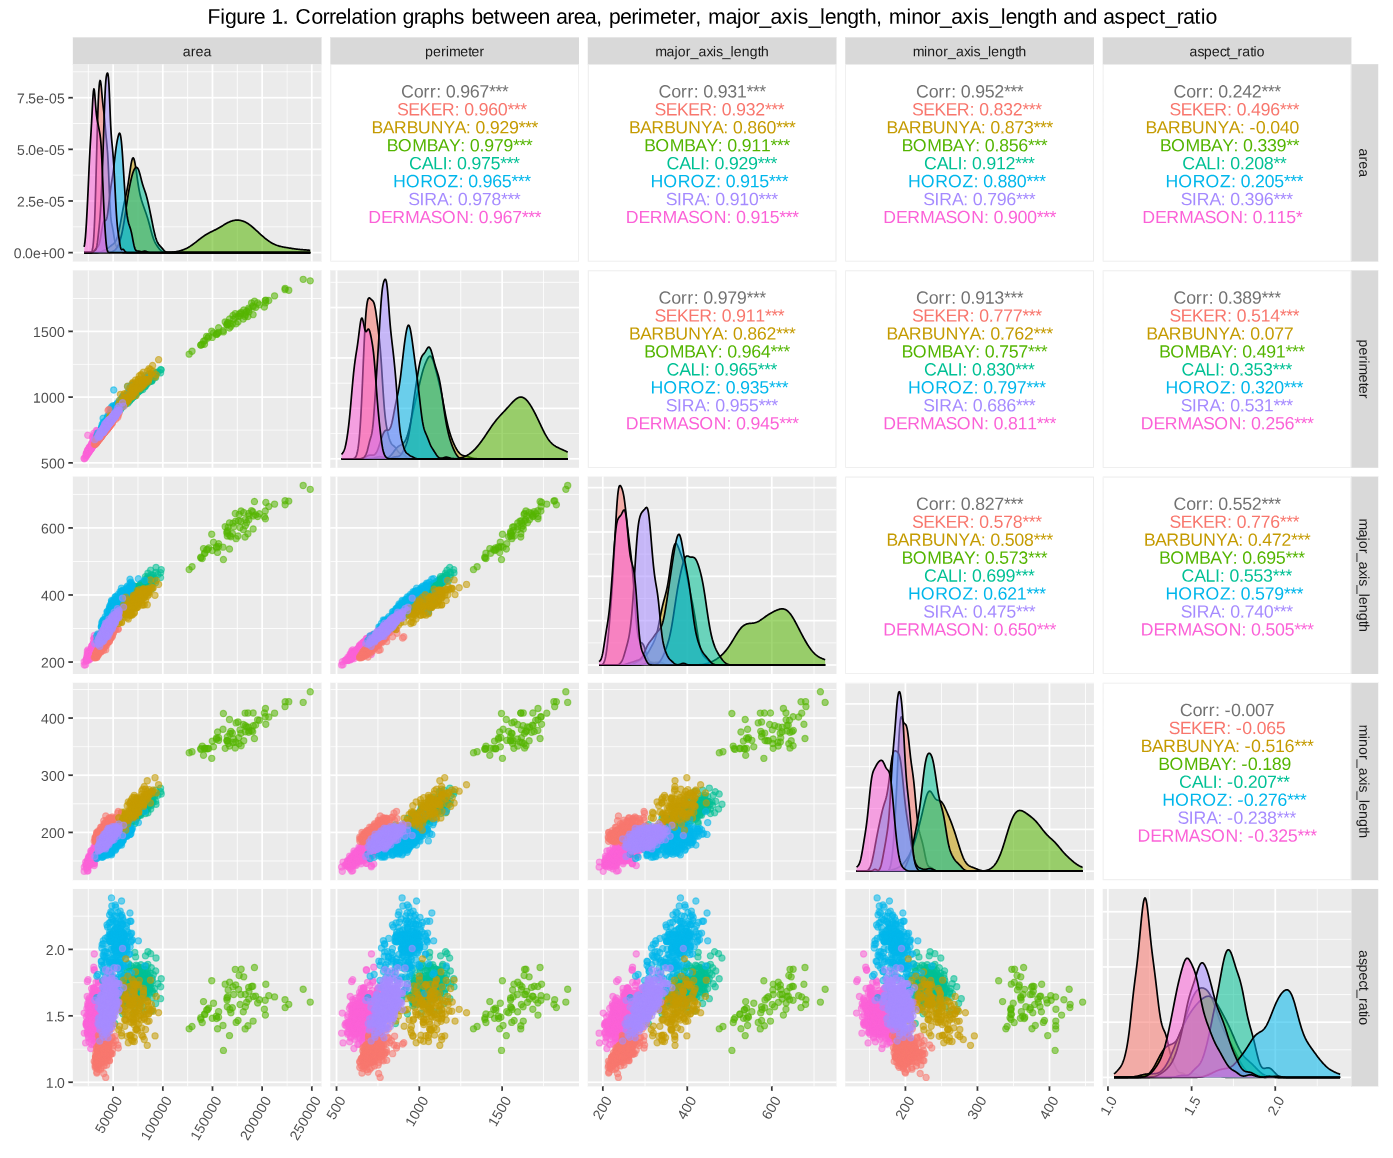

The variables `area`, `perimeter`, `major_axis_length`, and `minor_axis_length` have strong relationships, so these will be used as predictors.

Plot the variables `eccentricity`, `convex_area`, `equiv_diameter`, `convex_area`, `shape_factor_3` and `compactness` to find any correlations between these variables. 

In [11]:
# options(repr.plot.height = 10, repr.plot.width = 12)

# See if the variables eccentricity, convex_area, equiv_diameter, shape_factor_3, and compactness have any relationship with each other
# dry_bean_ecc_to_sol <- dry_bean_small |>
#                        select(eccentricity, convex_area, equiv_diameter, shape_factor_3, compactness , class)

# Use ggpairs to see if the above mentioned variables have any correlation
# ggpairs(dry_bean_ecc_to_sol, columns = 1:5, aes(color = class, alpha = 0.5)) +
# ggtitle("Figure 2. Correlation graphs between eccentricity, convex_area, equiv_diameter, shape_factor_3 and compactness") +
# theme(axis.text.x = element_text(angle = 60, hjust = 1), plot.title = element_text(hjust = 0.5))

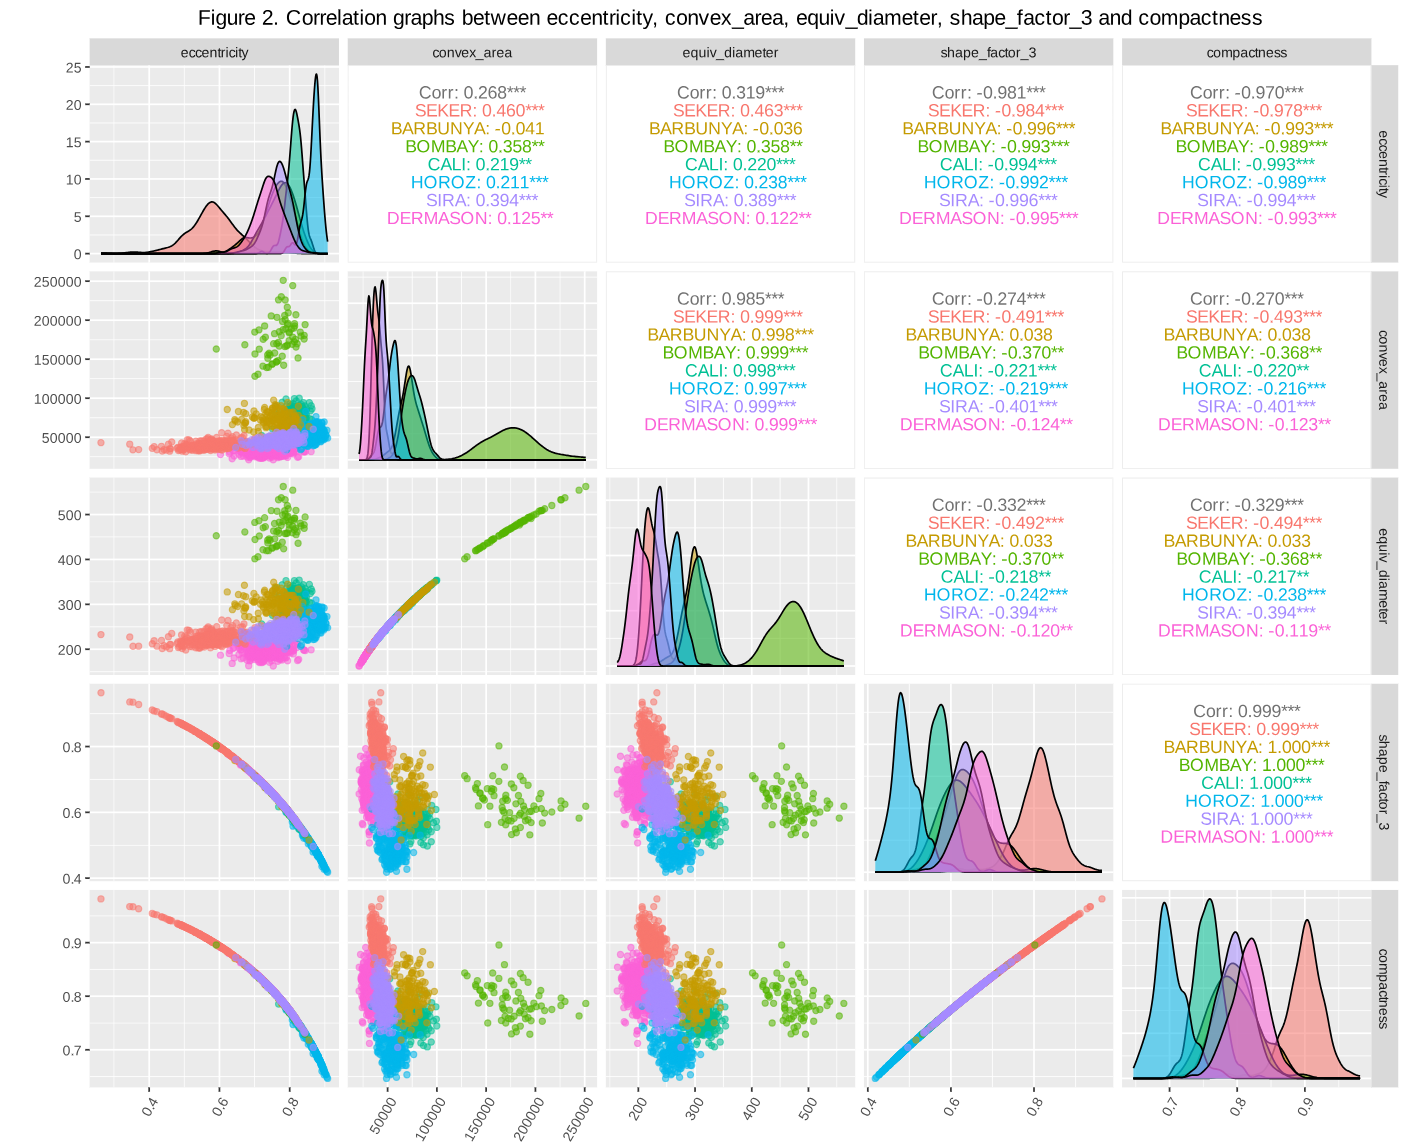

The variables `convex_area` and `equiv_diameter` have a strong relationship, and `shapefactor_3` and `compactness` also have a strong relationship so plot these against `area`, `perimeter`, `major_axis_length`, and `minor_axis_length` seperately as we cannot plot too many preditors at the same time due to our computation limitation, to find any correlations between these variables.
First we plot `convex_area`, `equiv_diameter`, `area`, `perimeter`, `major_axis_length`, and `minor_axis_length`

In [12]:
# options(repr.plot.height = 10, repr.plot.width = 12)

# See if the variables area, perimeter, major axis length, minor axis length, convex area, and equiv diameter have any correlation
# dry_bean_area_to_ed <- dry_bean_small |>
#                        select(area, perimeter, major_axis_length, minor_axis_length, convex_area, equiv_diameter, class)

# Use ggpairs to see if the above mentioned variables have any correlation
# ggpairs(dry_bean_area_to_ed, columns = 1:6, aes(color = class, alpha = 0.5)) +
# ggtitle("Figure 3. Correlation graphs between area, perimeter, major_axis_length, minor_axis_length, convex_area and equiv_diameter") +
# theme(axis.text.x = element_text(angle = 60, hjust = 1), plot.title = element_text(hjust = 0.5))

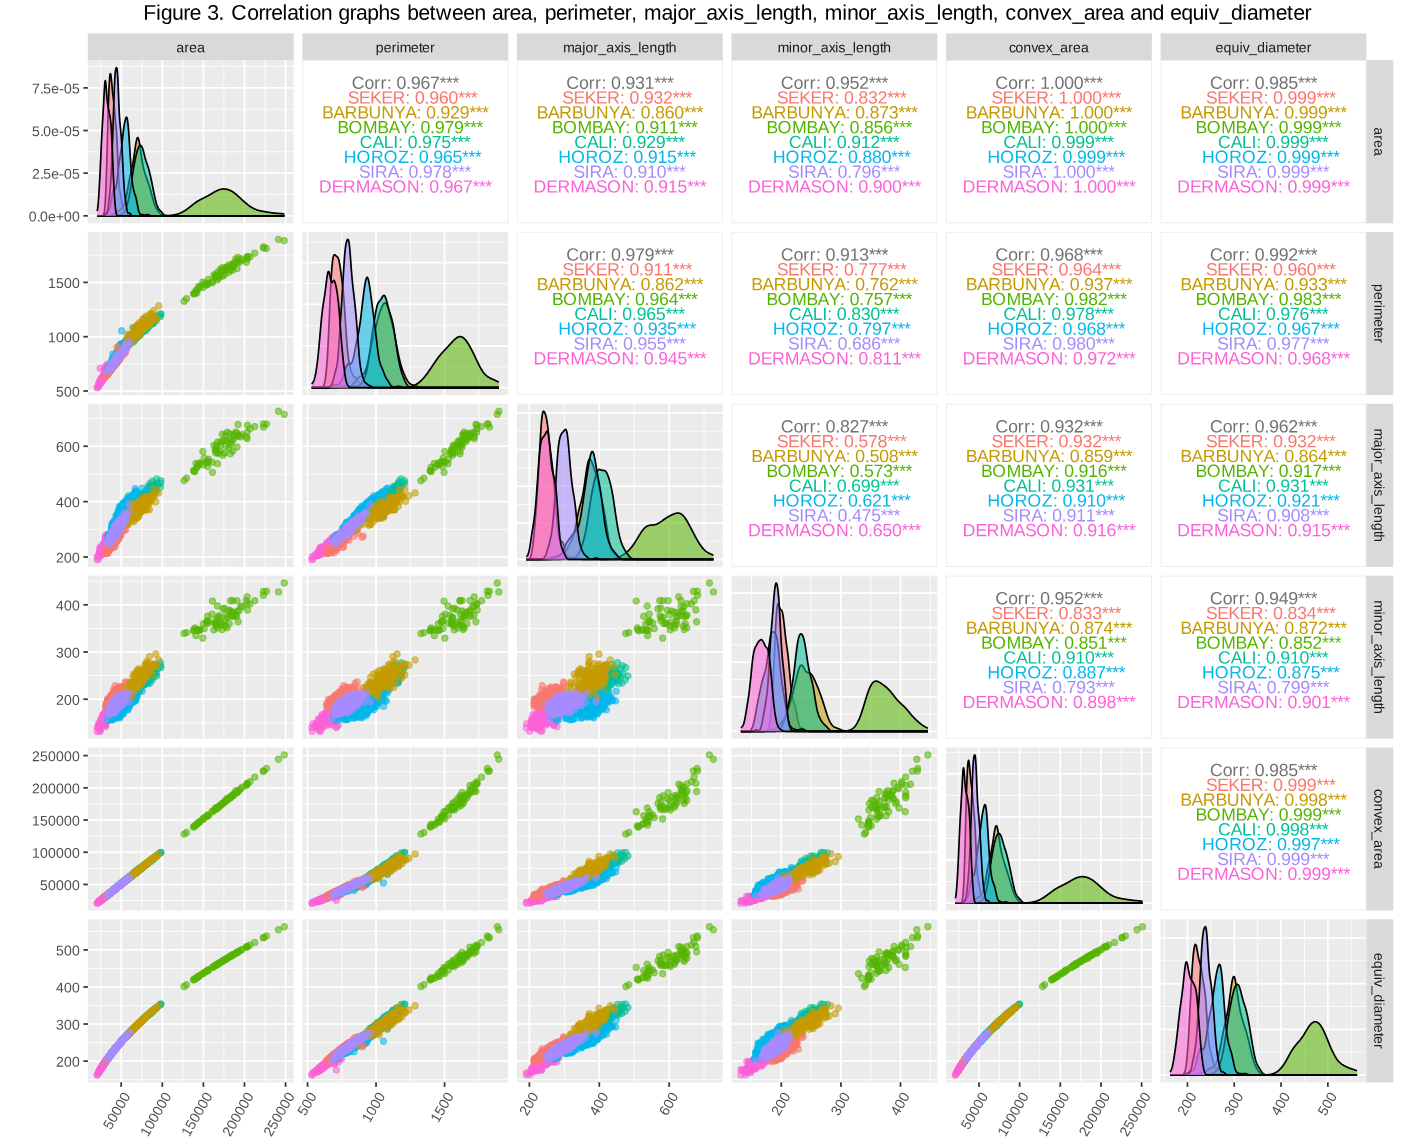

All of these variables have strong relationships, so we can use these variables as predictors.

Now, we plot `shapefactor_3`, `compactness`, `area`, `perimeter`, `major_axis_length`, and `minor_axis_length` to see thier correlation together.

In [13]:
# options(repr.plot.height = 10, repr.plot.width = 12)

# See if the variables roundness, compactness, shape factor 1, 2, 3, and 4 have any correlation
# dry_bean_roundness_to_sf4 <- dry_bean_small |>
#                             select(area, perimeter, major_axis_length, minor_axis_length, compactness, shape_factor_3, class)

# Use ggpairs to see if the above mentioned variables have any correlation
# ggpairs(dry_bean_roundness_to_sf4, columns = 1:6, aes(color = class, alpha = 0.5)) +
# ggtitle("Figure 4. Correlation graphs between area, perimeter, major_axis_length, minor_axis_length, compactness and shape_factor_3") +
# theme(axis.text.x = element_text(angle = 60, hjust = 1), plot.title = element_text(hjust = 0.5))

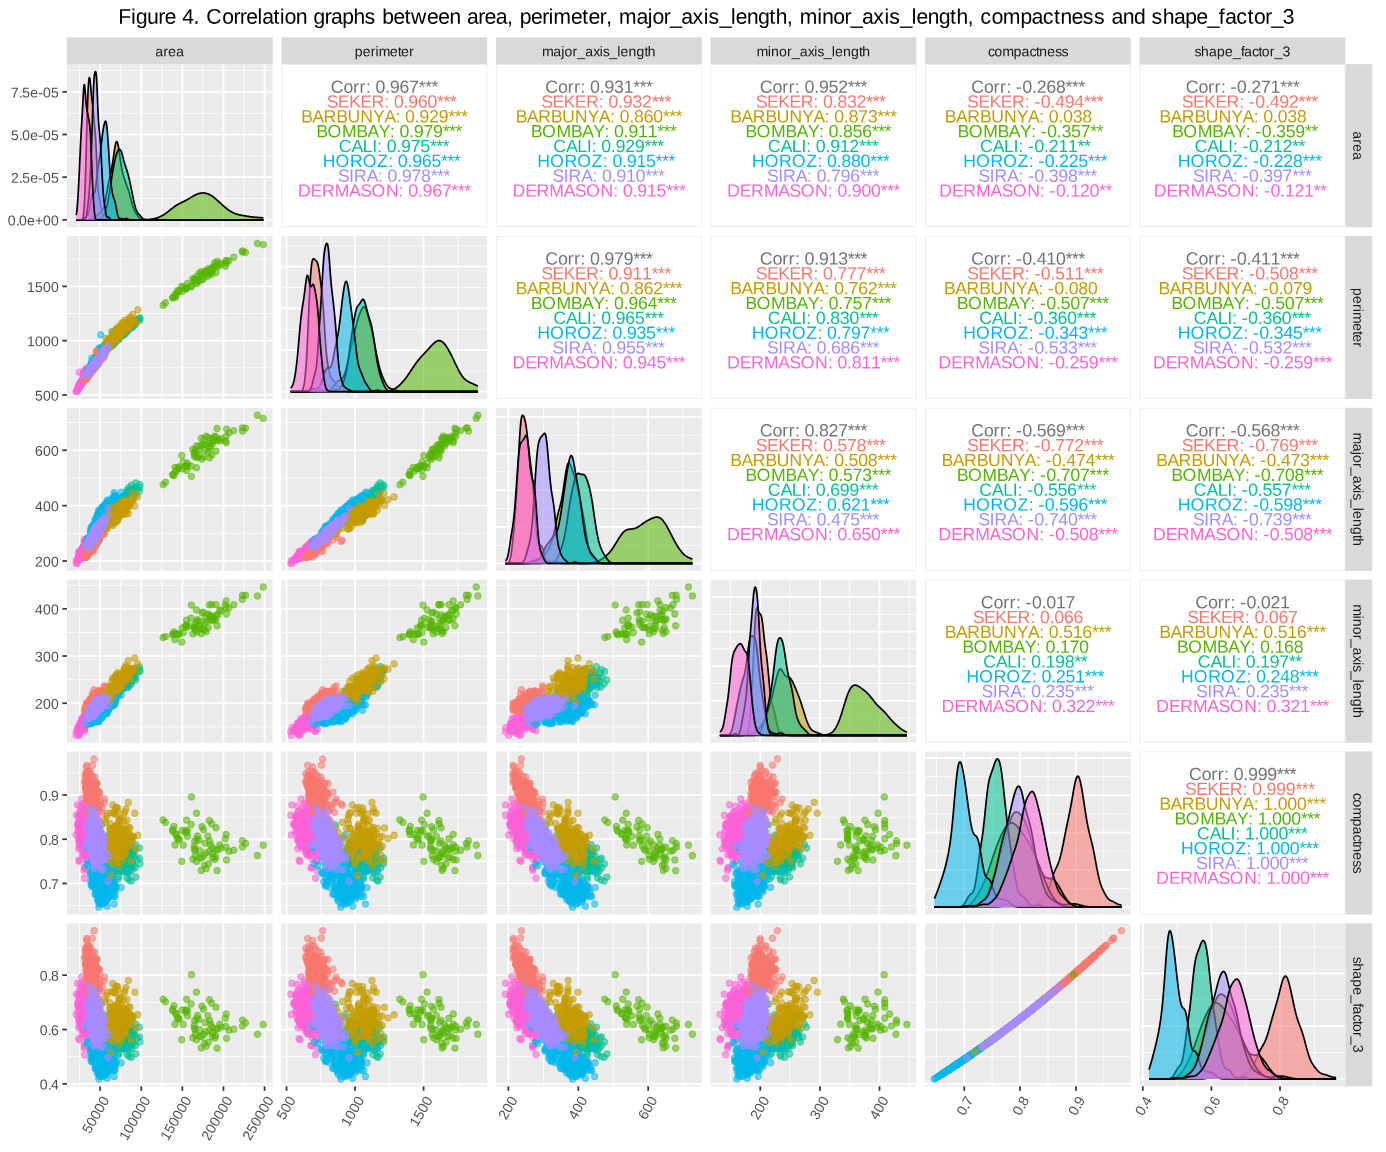

There is no relationship between our determined predictors and the new variables, so we will not use `compactness` and `shape_factor_3` as predictors.

Based on this, we can determine that our predictors will be `area`, `perimeter`, `major_axis_length`, `minor_axis_length`, `convex_area`, and `equiv_diameter`.

**4) Preprocessing the training data set**

Below, we split the training data further into a smaller proportion of 36% of the training dataset as the original training dataset is too large for the kernel to run. This is a limitation to our project due to the limit in computation power.

In [ ]:
dry_bean_train_new <- initial_split(dry_bean_train, prop = 0.36, strata = class) |>
                      training()

set.seed(1234)

dry_bean_recipe <- recipe(class ~ area + perimeter + major_axis_length + minor_axis_length + convex_area + equiv_diameter, 
                          data = dry_bean_train_new) |>
                   step_scale(all_predictors()) |>
                   step_center(all_predictors())

dry_bean_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                 set_engine("kknn") |>
                 set_mode("classification")

dry_bean_fit <- workflow() |>
                add_recipe(dry_bean_recipe) |>
                add_model(dry_bean_spec) |>
                fit(data = dry_bean_train_new)

dry_bean_fit

Warning message:
“tune samples were requested but there were 3672 rows in the data. 3667 will be used.”


**5) Training the classifier**

In [13]:
options(repr.plot.height = 5, repr.plot.width = 6)

# Use 5-fold cross validation
dry_bean_vfold <- vfold_cv(dry_bean_train_new , v = 5, strata = class)

dry_bean_tibble <- tibble(neighbors = seq(from = 2, to = 10, by = 1))

# Find the accuracy of our model for different values of K
vfold_metrics <- workflow() |>
                 add_recipe(dry_bean_recipe) |>
                 add_model(dry_bean_spec) |>
                 tune_grid(resamples = dry_bean_vfold, grid = dry_bean_tibble) |>
                 collect_metrics() |>
                 filter(.metric == "accuracy")

cross_val_plot <- ggplot(vfold_metrics, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = "Number of Neighbors (k)", y = "Accuracy") +
                  ggtitle("Figure 5: Graph of accuracy against number of neighbors (K)") +
                  theme(text = element_text(size = 12)) 

cross_val_plot

ERROR: Error in eval(expr, envir, enclos): object 'dry_bean_train_new' not found


Based on the graph above, we can determine that the best K value for our data set is **K = 9**.

**6) Build our new model**

Now that we found the best K value, we can build our final classification model.

In [16]:
dry_bean_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
                       set_engine("kknn") |>
                       set_mode("classification")

dry_bean_final_fit <- workflow() |>
                      add_recipe(dry_bean_recipe) |>
                      add_model(dry_bean_final_spec) |>
                      fit(data = dry_bean_train_new)

We can use this new model on our training set and test its accuracy.

**7) Evaluation of our prediction**

In [17]:
# Use our model to predict the classes of the beans in the testing set
dry_bean_predictions <- predict(dry_bean_final_fit, dry_bean_test) |>
                        bind_cols(dry_bean_test)

# Find the accuracy of our model
dry_bean_metrics <- dry_bean_predictions |> 
                    metrics(truth = class, estimate = .pred_class) |>
                    filter(.metric == "accuracy")

dry_bean_conf_mat <- dry_bean_predictions |>
                     conf_mat(truth = class, estimate = .pred_class) 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.903349


          Truth
Prediction SEKER BARBUNYA BOMBAY CALI HOROZ SIRA DERMASON
  SEKER      471        2      0    0     0    6       13
  BARBUNYA     2      284      0   11     3    0        0
  BOMBAY       0        1     99    0     0    0        0
  CALI         0       41      0  383    12    2        0
  HOROZ        0        6      0    8   452   11        1
  SIRA        25       12      0    2    19  566       53
  DERMASON    13        0      0    0     5   81      820

In [2]:
dry_bean_metrics

ERROR: Error in eval(expr, envir, enclos): object 'dry_bean_metrics' not found


<div align="center">Table 6. Accuracy of the Classification Model</div>

In [ ]:
dry_bean_conf_mat

<div align="center">Table 7. Confusion Matrix of the Classification Model</div>

## Results

We found that the best variables to use in our classification model to predict bean class were `area`, `perimeter`, `major_axis_length`, `minor_axis_length`, `convex_area`, and `equiv_diameter` as seen in table 5 and figures 1-4.

Using five-fold cross-validation, we found that using a K value of 9 in our model would give the highest accuracy.

Our final classification model using the predictors and K value found earlier resulted in a general accuracy of 90.3%, as seen in table 6. 

From the confusion matrix in table 7, we can calculate the precision of the classification model for each class of bean:
* Seker: 95.7%
* Barbunya: 94.7%
* Bombay: 99.0%
* Cali: 87.4%
* Horoz: 94.6
* Sira: 83.6%
* Dermason: 89.2%

## Discussion

**Summary of Methods**:
This project used the K-nearest neighbours algorithm to classify types of dry beans based on various features. The dataset was first cleaned by changing the class variable to a factor type. Then, the dataset was split into training and testing sets, with 75% of the dataset used for training and 25% for testing. Due to limitations in computing power, only 36% of the training dataset was actually used in creating the model. The predictors for the classification model were determined by finding the correlation between the variables, resulting in finding `area`, `perimeter`, `major_axis_length`, `minor_axis_length`, `convex_area`, and `equiv_diameter` to be the best predictors for the model. The training data was preprocessed by scaling and centering the values, and, along with the predictors, was to create a recipe. Using five-fold cross-validation, we determined the best K-value, which was then used to created a model specification. After this, the recipe and model specification was put through a workflow and fitted to create our final model. Using the classification model on the testing dataset, we found the accuracy and created a confusion matrix to further analyze the precision and accuracy of the model.


**Sampling and Sample Size Justification**:
Due to computational limitations, the dataset was sampled to reduce its size, allowing for efficient processing. We only used 36% of the training dataset as the limits in memory would cause the kernel to die if a larger sample was used. By sampling the data, it is assumed that the sample is representative of the population, enabling generalization of the findings to the larger dataset.

Without limitations in computing power, several improvements could be made:  
1) Utilizing the entire dataset for training and testing, which could potentially improve the model's accuracy.
2) Selecting better predictors, as we could only use 18% of the training dataset to find correlations between the variables. This could result in better accuracy of the classification model.
4) Conducting more extensive cross-validation to optimize the performance of the classification model, potentially increasing accuracy.

**Accuracy/Precision**:  The main goal for this project was to see how accurate of a classification model for beans could be using the K-nearest neighbours algorithm. Although we also calculated the precision of the classification model for each class of bean, this was to further understand how accurately our model could predict the class of each bean. Focusing on precision or recall requires a positive label, meaning that a certain class will be valued over others, while accuracy will give a general summary the performance of a classification model (Timbers et al., 2022). Because we are only worried about correctly predicting each type of bean, no class of bean is valued more than another, making accuracy a better indicator of how well our classification model performs. 


**Findings**:
Our model was found to have a accuracy of 90.3% and a precision ranging from 83.6% to 99.0% for each bean class. The high general accuracy and precision levels for each class of the classification model we built shows us that it is possible to create a very accurate model using the K-nearest neighbours algorithm to predict the class of Seker, Barbunya, Bombay, Cali, Horoz, Sira, and Dermason beans using data on the shape of these types of beans. In our proposal, we expected that the predictors we used to create our model would create a model that could classify beans with high accuracy. Our expectations aligned with our findings as the final classification model using the chosen predictors had an accuracy of 90.3%. 

**Impacts**:
Being able to create a model that precisely identifies types of beans means that this technology could be used on a larger scale in the agriculture industry. Our dry bean type classifier has big implications, not just for the dry bean industry, but also for the agriculture sector and society as a whole, as “the accurate identification of crop type is essential for the management of land, food security, and further policy planning” (Kumar et al., 2022). Moreover, the development of technology like computer vision systems for bean classification in the study by Koklu and his peers (2020) could be generalized to be used to increase efficiency in crop management in the larger agriculture sector.

**Future questions this could lead to**:  
Our creation of a dry bean classification model could potentially lead to future research:  
* _Can a model that can classify all crops be created_?
* _Can classification models using the K-nearest neighbours algorithm be used in practical settings_?
* _How much can the efficiency of crop management improve from implementing these classification models in the agriculture industry_?

---
## Citations

Koklu, M., & Ozkan, I. A. (2020). Multiclass classification of dry beans using computer vision and Machine Learning Techniques. Computers and Electronics in Agriculture, 174, 105507. https://doi.org/10.1016/j.compag.2020.105507 

Kumar, S., Meena, R. S., Sheoran, S., Jangir, C. K., Jhariya, M. K., Banerjee, A., & Raj, A. (2022). Remote Sensing for agriculture and Resource Management. Natural Resources Conservation and Advances for Sustainability, 91–135. https://doi.org/10.1016/b978-0-12-822976-7.00012-0 

Mamidi, S., Rossi, M., Annam, D., Moghaddam, S., Lee, R., Papa, R., & McClean, P. (2011). Investigation of the domestication of common bean (phaseolus vulgaris) using multilocus sequence data. Functional Plant Biology, 38(12), 953. https://doi.org/10.1071/fp11124  

Timbers, T., Campbell, T., & Lee, M. (2022). Data Science: A First Introduction. CRC Press, Taylor & Francis Group. 